0    9900
1     100
dtype: int64


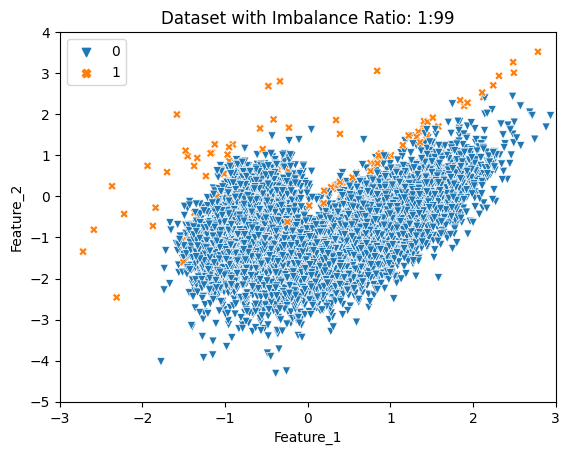

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

def plot_dataset(X, y, label):
    X = pd.DataFrame(X, columns = ["Feature_1", "Feature_2"])
    y = pd.Series(y)

    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(
        data = X, 
        x = "Feature_1", y = "Feature_2", 
        hue = y, 
        style = y, 
        markers = markers
    )

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()
    
    
    
X, y = make_classification(
    n_samples = 10000,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    flip_y = 0,
    n_clusters_per_class = 2,
    class_sep = 0.79,
    weights = [0.99],
    random_state = 81,
)

plot_dataset(X, y, "Dataset with Imbalance Ratio: 1:99")

### RepeatedEditedNearestNeighbours :

`RepeatedEditedNearestNeighbours` is an extension of the `EditedNearestNeighbours` technique used in machine learning for handling imbalanced datasets. It involves multiple iterations of the `EditedNearestNeighbours` process, where potentially noisy instances from the majority class are removed in each iteration. This repetition helps refine the dataset further by iteratively eliminating instances that may negatively impact model performance. The technique aims to enhance the robustness of the training data and improve the overall effectiveness of machine learning models on imbalanced classification tasks through repeated noise reduction.

Resampled dataset shape Counter({0: 6722, 1: 100})
0    6722
1     100
dtype: int64


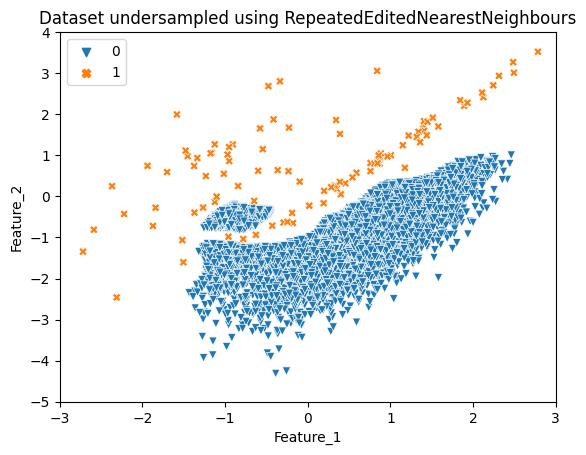

In [2]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy="auto", n_neighbors=200, kind_sel="all", max_iter=500
)
X_res, y_res = renn.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

plot_dataset(X_res, y_res, "Dataset undersampled using RepeatedEditedNearestNeighbours")